In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('spotify_updated.csv')

In [4]:
df.head()

,Unnamed: 0,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


# Nearest Neighbor (Most Similar)

In [26]:
df.head()

,Unnamed: 0,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


# Using nearest neighbor to find the closest songs (referring to each attribute) to Yellow by Coldplay

In [3]:
#get yellow by coldplay
yellow = df[(df['name'] == 'Yellow') & (df['artists'] == "['Coldplay']")]


# select acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence
yellow = yellow[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]
yellow

#find the song that is most similar to yellow by coldplay
from sklearn.neighbors import NearestNeighbors
import numpy as np

#fit the model
nn = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
nn.fit(df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']])
#find the most similar song
distances, indices = nn.kneighbors(yellow, n_neighbors=100)
indices

#find the most similar song
similar_song = df.iloc[indices[0]]
similar_song



,Unnamed: 0,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
20110,20110,4ZXQn6WL5OZUFukwZzATnu,Yellow,MTV2 Handpicked,6NXt4bgUdok1M479xmzwLv,['Coldplay'],['4gzpq5DPGxSnKTe4SA8HAU'],5,1,False,...,0.0291,0.002350,0.000069,0.3210,0.293,173.395,269160,4.0,2002,2002-01-22
66331,66331,4zlfnSwuvSLvSQdcZdUrRo,Sleestak And Yeti,The Shadow Out Of Tim,1KbGiFIRHc5DTjTWXHad3P,['The Darkest of The Hillside Thickets'],['4fOLLJNNh7h9Yk3BQL5Lnd'],12,1,False,...,0.0834,0.011000,0.000000,0.3050,0.333,173.442,215533,4.0,2007,2007-01-01
591921,591922,1RUjnjL8aoStImXblFxjig,Neither of Us Can See,Stealth-Music from the Motion Picture,3XhA5fZY7Khctm50sRyn05,['Incubus'],['3YcBF2ttyueytpXtEzn1Za'],3,1,False,...,0.0560,0.014600,0.000000,0.1060,0.378,173.445,244200,4.0,2005,2005-07-12
1020393,1020406,1913eQZxR6Q3kqCjj8Rwen,Must I Evolve? - Radio Edit,MUST I EVOLVE?,0Bz9ez8F1YpCF1DDVHVWhv,"['JARV IS...', 'Jarvis Cocker']","['5eZZMWCV8KtbntorYxoigR', '13W7XLRXdWeLmIu9va...",4,1,False,...,0.1570,0.012900,0.000269,0.1950,0.337,173.273,356598,4.0,2019,2019-07-31
851309,851310,4Yv3ITXZqnkDoVwms7LbQd,Driveway,Everything I Long for (20th Anniversary Edition),4r3uYLsOISDOTUHZJSfuOb,['Hayden'],['2EJpeCmBlwSNpb1GcTj1xp'],9,1,False,...,0.0362,0.000006,0.009900,0.0958,0.410,173.348,259533,4.0,2016,2016-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797173,797174,2hMaaOsAEZIp8TOCDFC1Mg,Dreams Like Knives,Emo Diaries - Chapter Eight - My Very Last Breath,60ze8cCPnh2ewaMEHR5FAD,['The Solo Project'],['5QfhvTadehFMsbSgisiFUt'],10,1,False,...,0.0840,0.024700,0.158000,0.0511,0.632,173.495,171347,3.0,2004,2004-08-31
326726,326726,3SVP51u0DX9GBliFhjCAeq,Devil Speaks,LET THE WORLD BURN,3ghQKfsTGOI7gVnDkcEdnr,['PRXJEK'],['6TeJpqb3PcvfHxjKAEKCNu'],4,1,True,...,0.1140,0.047500,0.001560,0.1960,0.164,172.935,154567,4.0,2017,2017-06-15
1172200,1172213,7kTZ1b0GVAkLcqANDui1ag,Ti Di Newid,Sbwriel Gwyn,7cGAxCbRaTbr8ydW0FeeO5,['Los Blancos'],['1ZQtf9whL0ZlspK3DS0O3a'],2,1,False,...,0.0325,0.000223,0.204000,0.0994,0.358,173.886,247127,4.0,2019,2019-09-27
242338,242338,17wOzNAceJ9qxdyK0Yqes0,Friends We Won't Forget,Hard 2 Love,0RnVSSUbSBEjk5MlQZhYYP,['Lee Brice'],['5Zq7R5qmi58ByYyBQTlNuk'],8,1,False,...,0.0683,0.010400,0.000000,0.2310,0.361,173.963,218947,4.0,2012,2012-04-24


,Unnamed: 0,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


# Clustering

In [4]:
coldplay_songs = df[df['artists'].apply(lambda x: 'coldplay' in x.lower())]
coldplay_songs['coldplay'] = True
doom_songs = df[df['artists'].apply(lambda x: 'mf doom' in x.lower())]
doom_songs['coldplay'] = False

coldplay_doom = pd.concat([coldplay_songs, doom_songs])

subset = coldplay_doom

/var/folders/_1/8fw6702n7g37rnlh6_20h3700000gn/T/ipykernel_8409/936449646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coldplay_songs['coldplay'] = True
/var/folders/_1/8fw6702n7g37rnlh6_20h3700000gn/T/ipykernel_8409/936449646.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doom_songs['coldplay'] = False


In [5]:
features = subset.columns[8:-2]
X = subset[features]

In [6]:
# apply standard scaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
# convert to Z-scores

## Compressing multiple columns to just 2 columns

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_reduced = pca.fit_transform(scaled_features)



## Making a scatter plot

,Unnamed: 0,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date,coldplay
20110,20110,4ZXQn6WL5OZUFukwZzATnu,Yellow,MTV2 Handpicked,6NXt4bgUdok1M479xmzwLv,['Coldplay'],['4gzpq5DPGxSnKTe4SA8HAU'],5,1,False,...,0.002350,0.000069,0.3210,0.293,173.395,269160,4.0,2002,2002-01-22,True
121350,121350,6BMIgTmZAihjW5MKEo7gvV,Brothers & Sisters,Brothers & Sisters,1As5m9qcOZtuFzdlzCkrzI,['Coldplay'],['4gzpq5DPGxSnKTe4SA8HAU'],1,1,False,...,0.297000,0.000000,0.2150,0.371,72.078,245533,4.0,1999,1999-04-26,True
121351,121351,6KHZ9SElsSmjQI7B9D0e4P,Easy To Please,Brothers & Sisters,1As5m9qcOZtuFzdlzCkrzI,['Coldplay'],['4gzpq5DPGxSnKTe4SA8HAU'],2,1,False,...,0.752000,0.256000,0.3570,0.153,73.998,181960,4.0,1999,1999-04-26,True
121352,121352,4eJNA83TrqZ3S6LSyK8rSf,Only Superstition,Brothers & Sisters,1As5m9qcOZtuFzdlzCkrzI,['Coldplay'],['4gzpq5DPGxSnKTe4SA8HAU'],3,1,False,...,0.152000,0.000048,0.0888,0.676,87.297,228667,4.0,1999,1999-04-26,True
384567,384567,65cBIwdOMbTPEY8D9V7aRp,Midnight - Giorgio Moroder Remix,Midnight (Giorgio Moroder Remix),5pUVbNp8AeHd6Vt8bJWShA,"['Coldplay', 'Giorgio Moroder']","['4gzpq5DPGxSnKTe4SA8HAU', '6jU2Tt13MmXYk0ZBv1...",1,1,False,...,0.000414,0.793000,0.0785,0.483,127.009,517746,4.0,2014,2014-04-21,True


In [23]:
X_reduced.shape

(323, 2)

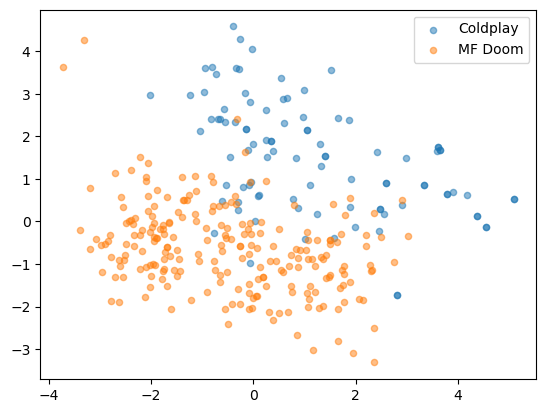

In [28]:
from matplotlib import pyplot as plt 

coldplay = X_reduced[subset['coldplay'].values]
mf_doom = X_reduced[~subset['coldplay'].values]

plt.scatter(coldplay[:,0], coldplay[:,1], s=20, alpha=0.5)
plt.scatter(mf_doom[:,0], mf_doom[:,1], s=20, alpha=0.5)

# for i in range(len(subset)):
#     plt.annotate(subset['name'].iloc[i], (X_reduced[i, 0], X_reduced[i, 1]))

plt.legend(['Coldplay', 'MF Doom'])

/Users/wfoster/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but NearestNeighbors is expecting 9 features as input.

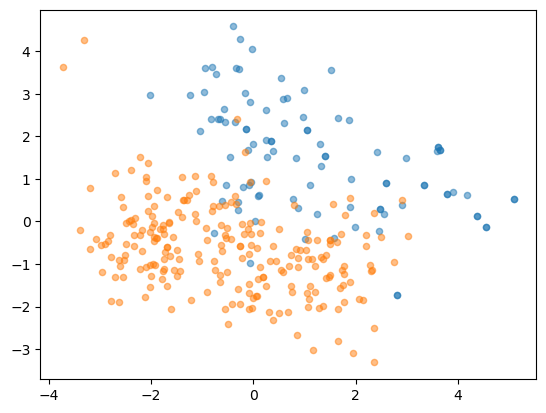

In [31]:
from matplotlib import pyplot as plt 

# Plot the scatter plot
plt.scatter(coldplay[:,0], coldplay[:,1], s=20, alpha=0.5)
plt.scatter(mf_doom[:,0], mf_doom[:,1], s=20, alpha=0.5)


# Add a new point for demonstration
new_point = np.array([[1.5, -1]])

# Find the nearest neighbor to the new point
distances, indices = nn.kneighbors(new_point, n_neighbors=1)

# Plot the nearest neighbor point
plt.scatter(X_reduced[indices[0], 0], X_reduced[indices[0], 1], color='red', marker='x', s=100)

plt.legend(['Coldplay', 'MF Doom', 'Nearest Neighbor'])




In [40]:
#receive all the songs and their features
df = pd.read_csv('spotify_updated.csv')
df.head()

#select the features
features = df.columns[8:-2]
X = df[features]

#apply standard scaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
#convert to Z-scores

#apply PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(scaled_features)


## Which attributes are most predictive of a song being by Coldplay?

In [ ]:
#Which features are most predictive of a song being by Coldplay?
#apply logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, df['artists'].apply(lambda x: 'coldplay' in x.lower()))

#find the most predictive features
log_reg.coef_

## Sorted coefficients

In [48]:
#print column names of features and their coefficients, sorted by coefficient value
sorted(list(zip(features, log_reg.coef_[0])), key=lambda x: x[1])



[('key', -0.07235872850333286),
 ('tempo', -0.043991857843501264),
 ('disc_number', -0.016684554600100897),
 ('mode', -0.010149218391049942),
 ('acousticness', -0.009036185980867063),
 ('energy', -0.005079761267842574),
 ('instrumentalness', -0.0043622037760724566),
 ('time_signature', -0.004342092374528214),
 ('liveness', -0.003605558790392751),
 ('explicit', -0.0020973220826034523),
 ('valence', -0.0006930536515279964),
 ('danceability', -0.0006647669048751718),
 ('speechiness', -0.0006147954797876586),
 ('duration_ms', -7.390299002397097e-06),
 ('loudness', 0.31495322750006505)]

In [49]:
#Which features are most predictive of a song being by MF DOOM?
#apply logistic regression
log_reg = LogisticRegression()
log_reg.fit(X, df['artists'].apply(lambda x: 'mf doom' in x.lower()))

#find the most predictive features
log_reg.coef_

array([[-1.29986784e-02, -5.23185943e-05, -9.99452004e-05,
        -3.39276187e-03, -5.76227727e-02,  2.61651627e-01,
        -8.28416074e-03, -1.51579973e-04, -8.09467193e-03,
        -3.42724701e-03, -2.93591242e-03,  1.87015544e-04,
        -3.08900628e-02, -1.27152091e-05, -3.92049890e-03]])

In [50]:
#print column names of features and their coefficients, sorted by coefficient value
sorted(list(zip(features, log_reg.coef_[0])), key=lambda x: x[1])

[('key', -0.057622772720069694),
 ('tempo', -0.030890062835646808),
 ('disc_number', -0.0129986783708572),
 ('mode', -0.008284160744585715),
 ('acousticness', -0.008094671933429484),
 ('time_signature', -0.003920498898835072),
 ('instrumentalness', -0.0034272470132795056),
 ('energy', -0.0033927618749065983),
 ('liveness', -0.0029359124235439214),
 ('speechiness', -0.0001515799734433102),
 ('danceability', -9.99452004183318e-05),
 ('explicit', -5.231859431004883e-05),
 ('duration_ms', -1.2715209102765886e-05),
 ('valence', 0.00018701554422562107),
 ('loudness', 0.2616516271591071)]

In [55]:
#Use nearest neighbor to find songs that are most similar based on their loudness
#fit the model
nn = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
nn.fit(df[['loudness']])
#find the most similar song
distances, indices = nn.kneighbors(yellow[['loudness']], n_neighbors=100)
indices

#find the most similar song
similar_song = df.iloc[indices[0]]
similar_song

#Just show the song names, artists, and loudness
similar_song[['name', 'artists', 'loudness']]


,name,artists,loudness
347727,Ain't No Ninjas (Hidden Track),['Worm Quartet'],-5.293
250096,Tease Me,['Ultraviolet Hippopotamus'],-5.293
493040,Lemonface,['Crazy Town'],-5.293
1121212,Simple Kind of Life,['Vitamin String Quartet'],-5.293
836407,Happy Hour - Ødyssey Remix,"['Weezer', 'Ødyssey']",-5.293
...,...,...,...
71006,The Real World,['Ekundayo'],-5.293
297642,With Hope I Breathe,['The Victor Ship'],-5.293
191383,Set Me Free,['Monotonix'],-5.293
73292,She Said,['T'],-5.292


ModuleNotFoundError: No module named 'mlxtend'